In [31]:
import pandas as pd
import numpy as np
import glob
import csv
import os
import seaborn as sns

import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
#Citation https://www.chicagoappleseed.org/2021/03/19/decarcerating-cook-county-states-attorneys-diversion-programs/

## Load data

In [32]:
df_initiation = pd.read_csv('Initiation.csv')
df_sentence = pd.read_csv('Sentencing.csv')
df_diversion = pd.read_csv('Diversion.csv')

In [33]:
rows_initiation = ['CASE_ID','CHARGE_ID','CASE_PARTICIPANT_ID','ARREST_DATE','RACE', 'GENDER',
                   'AGE_AT_INCIDENT','INCIDENT_CITY','BOND_TYPE_CURRENT','BOND_AMOUNT_INITIAL']

df_initiation = df_initiation[rows_initiation].copy()
#Create two value pairs from df to identify the datatypes and null values
null_ = df_initiation.isna().any()
dtypes = df_initiation.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print('Initiation dataset:')
print(info)
df_initiation.describe().T
df_initiation.head()

Initiation dataset:
                      Null     type
CASE_ID              False    int64
CHARGE_ID            False    int64
CASE_PARTICIPANT_ID  False    int64
ARREST_DATE           True   object
RACE                  True   object
GENDER                True   object
AGE_AT_INCIDENT       True  float64
INCIDENT_CITY         True   object
BOND_TYPE_CURRENT     True   object
BOND_AMOUNT_INITIAL   True  float64


,CASE_ID,CHARGE_ID,CASE_PARTICIPANT_ID,ARREST_DATE,RACE,GENDER,AGE_AT_INCIDENT,INCIDENT_CITY,BOND_TYPE_CURRENT,BOND_AMOUNT_INITIAL
0,217923815445,346276626721,209353063152,5/22/2011 6:51:00 PM,Black,Male,22.0,NaN,No Bond,NaN
1,217923815445,346277682512,209353063152,5/22/2011 6:51:00 PM,Black,Male,22.0,NaN,No Bond,NaN
2,217923815445,346278587476,209353063152,5/22/2011 6:51:00 PM,Black,Male,22.0,NaN,No Bond,NaN
3,217923815445,346278889131,209353063152,5/22/2011 6:51:00 PM,Black,Male,22.0,NaN,No Bond,NaN
4,217923815445,346279442165,209353063152,5/22/2011 6:51:00 PM,Black,Male,22.0,NaN,No Bond,NaN


In [34]:
rows_sentence = ['CASE_ID','CASE_PARTICIPANT_ID','CHARGE_ID','UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE',
                 'DISPOSITION_DATE','CHARGE_DISPOSITION','COMMITMENT_TERM','COMMITMENT_TYPE','ARREST_DATE', 'AGE_AT_INCIDENT', 'RACE', 'GENDER']

df_sentence = df_sentence[rows_sentence].copy()
#Create two value pairs from df to identify the datatypes and null values
null_ = df_sentence.isna().any()
dtypes = df_sentence.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','Data Type'])
print('Sentencing dataset:')
print(info)
df_sentence.describe().T

Sentencing dataset:
                           Null Data Type
CASE_ID                   False     int64
CASE_PARTICIPANT_ID       False     int64
CHARGE_ID                 False     int64
UPDATED_OFFENSE_CATEGORY  False    object
SENTENCE_TYPE             False    object
DISPOSITION_DATE          False    object
CHARGE_DISPOSITION        False    object
COMMITMENT_TERM            True    object
COMMITMENT_TYPE            True    object
ARREST_DATE                True    object
AGE_AT_INCIDENT            True   float64
RACE                       True    object
GENDER                     True    object


,count,mean,std,min,25%,50%,75%,max
CASE_ID,248146.0,3.994418e+11,4.021778e+10,1.497653e+11,3.911642e+11,4.052353e+11,4.200996e+11,4.455932e+11
CASE_PARTICIPANT_ID,248146.0,7.592764e+11,1.278659e+11,9.675748e+10,7.350705e+11,7.770306e+11,8.238105e+11,9.055352e+11
CHARGE_ID,248146.0,3.727833e+11,5.683272e+10,5.051006e+10,3.554747e+11,3.786575e+11,4.044695e+11,4.484368e+11
AGE_AT_INCIDENT,238359.0,3.230426e+01,1.178892e+01,1.700000e+01,2.300000e+01,2.900000e+01,4.000000e+01,1.370000e+02


In [35]:
df_sentence.groupby(['UPDATED_OFFENSE_CATEGORY','COMMITMENT_TYPE'])['CHARGE_ID'].count().reset_index()

,UPDATED_OFFENSE_CATEGORY,COMMITMENT_TYPE,CHARGE_ID
0,Aggravated Assault Police Officer,710/410 Probation,3
1,Aggravated Assault Police Officer,Conditional Discharge,13
2,Aggravated Assault Police Officer,Cook County Boot Camp,2
3,Aggravated Assault Police Officer,Cook County Department of Corrections,18
4,Aggravated Assault Police Officer,Court Supervision,6
...,...,...,...
794,Violation Order Of Protection,Illinois Department of Corrections,264
795,Violation Order Of Protection,Intensive Probation Services,6
796,Violation Order Of Protection,Mental Health Probation,18
797,Violation Order Of Protection,Probation,90


In [36]:
rows_diversion = ['CASE_ID', 'CASE_PARTICIPANT_ID','DIVERSION_PROGRAM','DIVERSION_COUNT','PRIMARY_CHARGE_OFFENSE_TITLE','DIVERSION_RESULT']

df_diversion = df_diversion[rows_diversion].copy()
#Create two value pairs from df to identify the datatypes and null values
null_ = df_diversion.isna().any()
dtypes = df_diversion.dtypes
info = pd.concat([null_,dtypes], axis=1,keys=['Null','type'])
print('Diversion dataset:')
print(info)
df_diversion.describe().T

Diversion dataset:
                               Null    type
CASE_ID                       False   int64
CASE_PARTICIPANT_ID           False   int64
DIVERSION_PROGRAM             False  object
DIVERSION_COUNT               False   int64
PRIMARY_CHARGE_OFFENSE_TITLE  False  object
DIVERSION_RESULT               True  object


,count,mean,std,min,25%,50%,75%,max
CASE_ID,22508.0,4.167276e+11,1.703045e+10,3.826730e+11,4.032952e+11,4.194122e+11,4.316351e+11,4.461888e+11
CASE_PARTICIPANT_ID,22508.0,8.138737e+11,5.288961e+10,7.107259e+11,7.709487e+11,8.216187e+11,8.607917e+11,9.074669e+11
DIVERSION_COUNT,22508.0,1.053848e+00,2.377993e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00


## Transformation & Cleaning

- Two datasets will be created. One will contain the defendants who were referred to 1 or more diversion program and the other will contain defedents who were NOT referred to a diversion program (e.g., assistance with substance abuse, employment, mental health treatment, etc.)
** Based on my inital EDA, I identified that since 2011 there has been a steady decrease in overall charge count and an increase in mental health treatment as a commitment type Around that same time the CCSAO started offering alternative sentence types to defendants in the form of diversion programs

In [38]:
# Dataframe for defendants who were referred to 1 or more diversion program
# Merge the initiation & setnece dataframes on CASE_PARTICIPANT_ID
df_initiationsentence_participantID = pd.merge(
    df_initiation,df_sentence,how='inner',on='CASE_PARTICIPANT_ID').drop(
    ['CHARGE_ID_y','CASE_ID_y','ARREST_DATE_y','AGE_AT_INCIDENT_y','RACE_y', 'GENDER_y'], axis=1).rename(columns={'CASE_ID_x':'CASE_ID','CHARGE_ID_x':'CHARGE_ID','ARREST_DATE_x':'ARREST_DATE', 'AGE_AT_INCIDENT_x':'AGE_AT_INCIDENT','RACE_x':'RACE','GENDER_x':'GENDER'})
# Inner join the created dataframe from the previous step with the diversion dataset on CASE_PARTICIPANT_ID. This will allow us to have a dataframe that follows defedents from initiation to their diversion refereal programs. 
df_diversion_participants = pd.merge(df_initiationsentence_participantID, df_diversion, how='inner', on='CASE_PARTICIPANT_ID').drop(['CASE_ID_y'], axis=1).rename(columns={'CASE_ID_x':'CASE_ID'})


# As mentioned in the previous cell, we will filter the data to include dates after 2010, but I went a little further back to include the entire decade.
var_date_filter = '2010-01-01'

df_diversion_participants['ARREST_DATE'] = pd.to_datetime(df_diversion_participants['ARREST_DATE'],errors = 'coerce').dt.date
df_diversion_participants = df_diversion_participants[df_diversion_participants['ARREST_DATE'] >= pd.to_datetime(var_date_filter)]
df_diversion_participants_ = df_diversion_participants[df_diversion_participants['ARREST_DATE'] >= pd.to_datetime(var_date_filter)]

In [40]:
# Dataframe for defendants who were NOT referred to 1 or more diversion program
# Using the dataset made in the first step of the previous cell to select for defedents in the sentence data that are not found in the diversion data.
notin_diversion = df_initiationsentence_participantID.CASE_PARTICIPANT_ID[~df_initiationsentence_participantID.CASE_PARTICIPANT_ID.isin(df_diversion.CASE_PARTICIPANT_ID)]
df_NOTdiversion_participants = df_initiationsentence_participantID[df_initiationsentence_participantID["CASE_PARTICIPANT_ID"].isin(notin_diversion)]

# Filtering to include only data after 2010
df_NOTdiversion_participants['ARREST_DATE'] = pd.to_datetime(df_NOTdiversion_participants['ARREST_DATE'], errors = 'coerce').dt.date
df_NOTdiversion_participants = df_NOTdiversion_participants[df_NOTdiversion_participants['ARREST_DATE'] >= pd.to_datetime(var_date_filter)]
df_NOTdiversion_participants_ = df_NOTdiversion_participants[df_NOTdiversion_participants['ARREST_DATE'] >= pd.to_datetime(var_date_filter)]

## EDA

In [41]:
# Group each dataframe on CASE_PARTICIPANT_ID and associated demographic details and aggregate by charge count

# Columns of interest
demographic_cols = ['CASE_ID','RACE','AGE_AT_INCIDENT','GENDER','CASE_PARTICIPANT_ID','UPDATED_OFFENSE_CATEGORY','DIVERSION_RESULT','CHARGE_ID','BOND_AMOUNT_INITIAL']
demographic_cols_NOTdiversion = ['CASE_ID','RACE','AGE_AT_INCIDENT','GENDER','CASE_PARTICIPANT_ID','UPDATED_OFFENSE_CATEGORY','CHARGE_ID','BOND_AMOUNT_INITIAL']

# Defendants who were referred to 1 or more diversion program
df_demographics_diversion = df_diversion_participants[demographic_cols].groupby(['CASE_PARTICIPANT_ID','RACE','UPDATED_OFFENSE_CATEGORY','GENDER','AGE_AT_INCIDENT','DIVERSION_RESULT','BOND_AMOUNT_INITIAL']
                                                   ).agg('count').rename(columns={'CASE_ID':'CASE_COUNT','CHARGE_ID':'CHARGE_COUNT'}).reset_index()
# Defendants who were NOT referred to 1 or more diversion program
df_demographics_NOTdiversion = df_NOTdiversion_participants[demographic_cols_NOTdiversion].groupby(['CASE_PARTICIPANT_ID','RACE','UPDATED_OFFENSE_CATEGORY','GENDER','AGE_AT_INCIDENT','BOND_AMOUNT_INITIAL']
                                                   ).agg('count').rename(columns={'CASE_ID':'CASE_COUNT','CHARGE_ID':'CHARGE_COUNT'}).reset_index()

### Remove outliers from both dataframes
-  To inrease the quality of certain analytics I intend to crease, I will need to remove the outeliers within the created dataframes. TO do this I will use the calculated z-score of the numeric featrues and then filter out any values > 0.9.

In [42]:
#Calculate z-scores
from scipy import stats
cols = ['AGE_AT_INCIDENT','CASE_COUNT', 'CHARGE_COUNT','BOND_AMOUNT_INITIAL']

## Defendants who were referred to 1 or more diversion program
demo_scores_div = pd.DataFrame(columns = cols)
demo_scores_div['CASE_PARTICIPANT_ID'] = df_demographics_diversion['CASE_PARTICIPANT_ID']
for var in cols:
    demo_scores_div[var] = np.abs(stats.zscore(df_demographics_diversion[var]))
    
## Defendants who were NOT referred to 1 or more diversion program
demo_scores_ndiv = pd.DataFrame(columns = cols)
demo_scores_ndiv['CASE_PARTICIPANT_ID'] = df_demographics_NOTdiversion['CASE_PARTICIPANT_ID']
for var in cols:
    demo_scores_ndiv[var] = np.abs(stats.zscore(df_demographics_NOTdiversion[var]))
    

In [43]:
#Remove values that have a z-score less than 0.9 for both dataframes

## Defendants who were referred to 1 or more diversion program
outliers_div = set()
for i, row in demo_scores_div.iterrows():
    if np.max(row[['AGE_AT_INCIDENT','CASE_COUNT', 'CHARGE_COUNT','BOND_AMOUNT_INITIAL']]) > 0.9:
        outliers_div.add(row['CASE_PARTICIPANT_ID']) 
        df_demographics_diversion = df_demographics_diversion[df_demographics_diversion['CASE_PARTICIPANT_ID'].isin(outliers_div)==False]

## Defendants who were NOT referred to 1 or more diversion program
outliers_ndiv = set()
for i, row in demo_scores_ndiv.iterrows():
    if np.max(row[['AGE_AT_INCIDENT','CASE_COUNT', 'CHARGE_COUNT','BOND_AMOUNT_INITIAL']]) > 0.9:
        outliers_ndiv.add(row['CASE_PARTICIPANT_ID']) 
        df_demographics_NOTdiversion = df_demographics_NOTdiversion[df_demographics_NOTdiversion['CASE_PARTICIPANT_ID'].isin(outliers_ndiv)==False]

### Validate that outliers have been removed and view value distribution within both dataframes

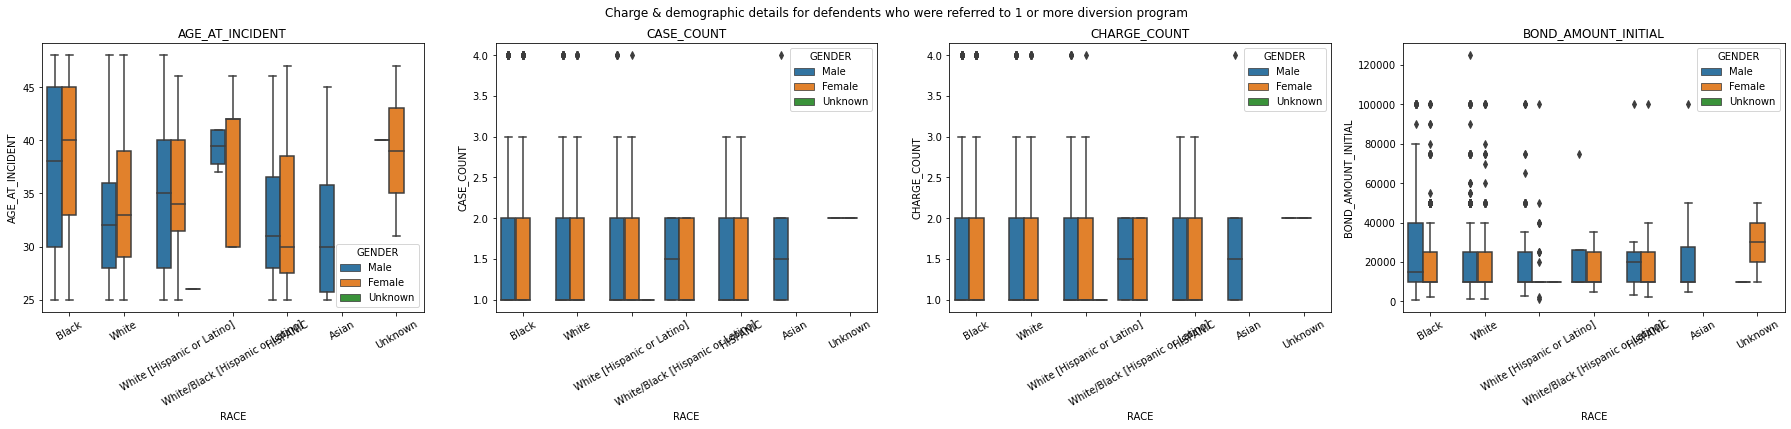

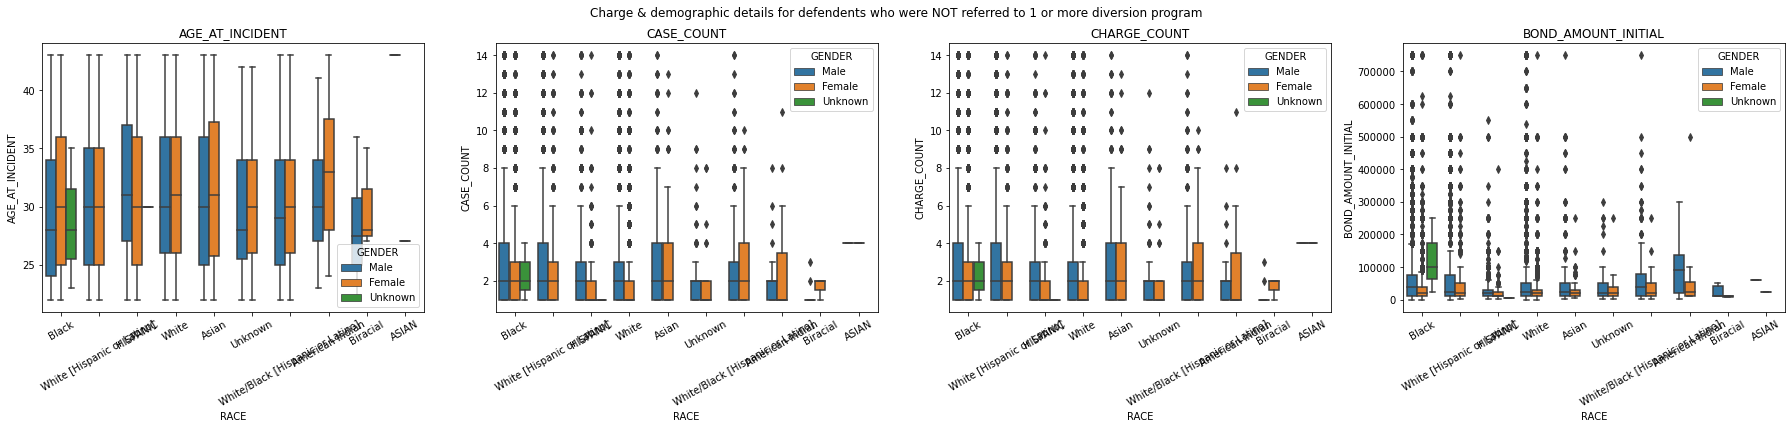

In [ ]:
cols = ['AGE_AT_INCIDENT','CASE_COUNT', 'CHARGE_COUNT','BOND_AMOUNT_INITIAL']
f = plt.figure(figsize=(25, 10))
cnt = 1
for y in cols:
    plt.suptitle('Charge & demographic details for defendants who were referred to 1 or more diversion program')
    plt.subplot(2,4,cnt)
    data = df_demographics_diversion.sort_values(by=y, ascending=False)
    ax = sns.boxplot(y=df_demographics_diversion[y], hue='GENDER', x='RACE',data=df_demographics_diversion)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=30)
    plt.ylabel(f"{y}")
    plt.title(f'{y}')
    cnt=cnt+1
f.tight_layout()
plt.show()


#Look for outliers
#Create the scatter plot
cols = ['AGE_AT_INCIDENT','CASE_COUNT', 'CHARGE_COUNT','BOND_AMOUNT_INITIAL']
f = plt.figure(figsize=(25, 10))
cnt = 1
for y in cols:
    plt.suptitle('Charge & demographic details for defendants who were NOT referred to 1 or more diversion program')
    plt.subplot(2,4,cnt)
    data = df_demographics_NOTdiversion.sort_values(by=y, ascending=False)
    ax = sns.boxplot(y=df_demographics_NOTdiversion[y], hue='GENDER', x='RACE',data=df_demographics_NOTdiversion)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=30)
    plt.ylabel(f"{y}")
    plt.title(f'{y}')
    cnt=cnt+1
f.tight_layout()

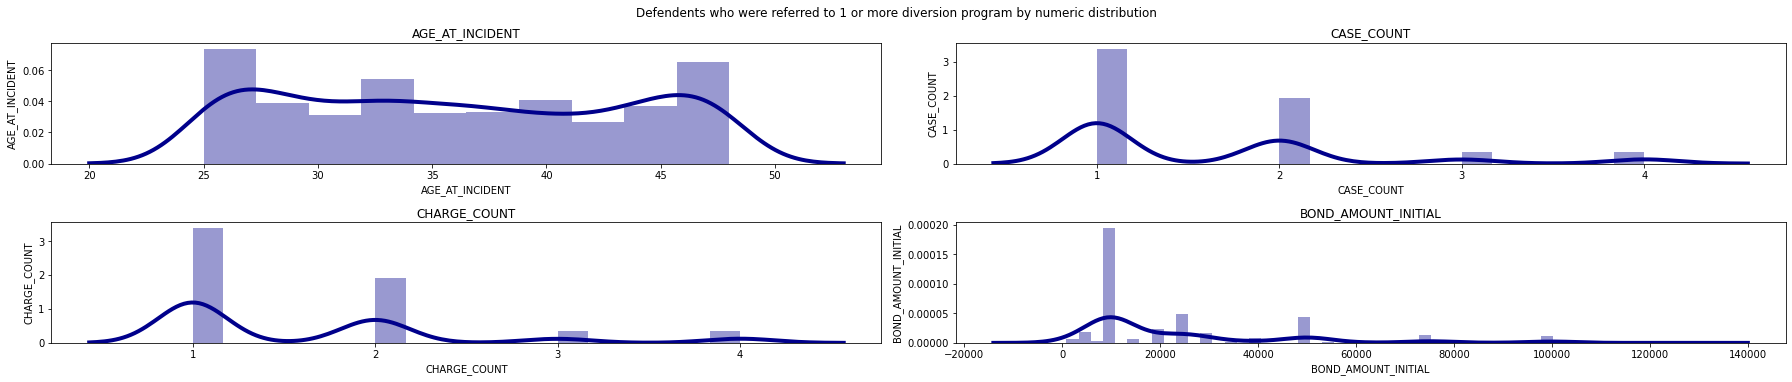

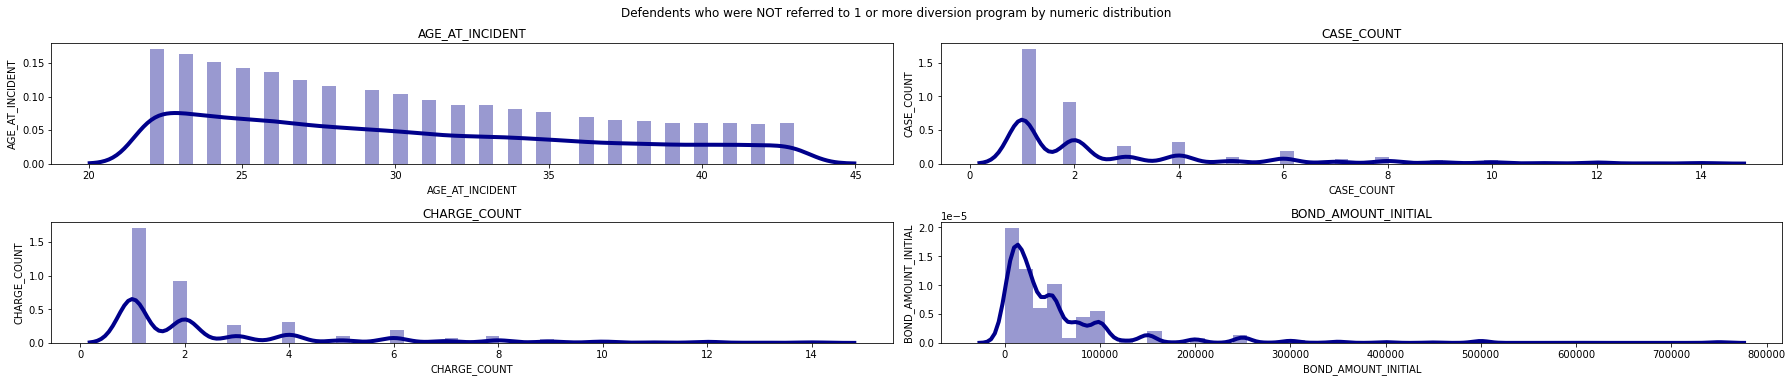

In [46]:
f = plt.figure(figsize=(25, 10))
cnt = 1
for y in cols:
    plt.suptitle('Defendants who were referred to 1 or more diversion program by numeric distribution')
    plt.subplot(4,2, cnt)
    data = df_demographics_diversion.sort_values(by=y, ascending=False)
    ax =  sns.distplot(df_demographics_diversion[y], hist=True,color='darkblue', kde_kws= {'linewidth': 4})
    plt.ylabel(f"{y}")
    plt.title(f'{y}')
    cnt=cnt+1
    f.tight_layout()
plt.show()


f = plt.figure(figsize=(25, 10))
cnt = 1
for y in cols:
    plt.suptitle('Defendants who were NOT referred to 1 or more diversion program by numeric distribution')
    plt.subplot(4,2, cnt)
    data = df_demographics_NOTdiversion.sort_values(by=y, ascending=False)
    ax =  sns.distplot(df_demographics_NOTdiversion[y], hist=True,color='darkblue', kde_kws= {'linewidth': 4})
    plt.ylabel(f"{y}")
    plt.title(f'{y}')
    cnt=cnt+1
    f.tight_layout()
plt.show()

## Analyze

This analysis aims to identify similarities between defendants referred to diversion programs and those who were not. Additionally, diversion program result is examined to look for bias toward any particular charge or defendant profile.
- What charge is offered diversion program referrals, what is the least?
- What diversion program is the most effective (highest graduation rate), what is the least?

### Offense category Summary statistics

In [71]:
# Group by offense type for defendants who were referred to 1 or more diversion program by numeric distribution'. 
# This first grouping counts all charges for each offense type
df_diversion_groupedOffense_count = df_diversion_participants_.groupby(
    ['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','DIVERSION_RESULT','AGE_AT_INCIDENT','DIVERSION_COUNT','BOND_AMOUNT_INITIAL','DIVERSION_PROGRAM'])['CHARGE_ID'].size().reset_index()
# This last grouping now averages the other numeric columns and renames them accordingly
df_diversion_groupedOffense = df_diversion_groupedOffense_count.groupby(
    ['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','DIVERSION_RESULT','CHARGE_ID','DIVERSION_PROGRAM'])['AGE_AT_INCIDENT','DIVERSION_COUNT','BOND_AMOUNT_INITIAL'].mean().reset_index().rename(
    columns={'AGE_AT_INCIDENT':'AVG_AGE_AT_INCIDENT','CHARGE_ID':'CHARGE_COUNT'}).sort_values(by='CHARGE_COUNT', ascending=False)

In [72]:
print('Offense category summary statistics, participants IN diversion program participants')
df_diversion_groupedOffense.describe().T

Offense category summary statistics, participants IN diversion program participants


,count,mean,std,min,25%,50%,75%,max
CHARGE_COUNT,1026.0,3.341131,3.809181,1.0,1.0,2.0,4.000000,43.0
AVG_AGE_AT_INCIDENT,1026.0,34.782913,12.068634,17.0,24.0,33.0,44.000000,73.0
DIVERSION_COUNT,1026.0,1.056583,0.208466,1.0,1.0,1.0,1.000000,3.0
BOND_AMOUNT_INITIAL,1026.0,30018.242568,46054.566808,1000.0,10000.0,20000.0,33333.333333,750000.0


In [73]:
# Group by offense type for defendants who were NOT referred to 1 or more diversion program by numeric distribution'. 
# This first grouping counts all charges for each offense type
df_Ndiversion_groupedOffense_count = df_NOTdiversion_participants_.groupby(
    ['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','AGE_AT_INCIDENT','BOND_AMOUNT_INITIAL'])['CHARGE_ID'].size().reset_index()
# This last grouping now averages the other numeric columns and renames them accordingly
df_Ndiversion_groupedOffense = df_Ndiversion_groupedOffense_count.groupby(
    ['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','CHARGE_ID'])['AGE_AT_INCIDENT','BOND_AMOUNT_INITIAL'].mean().reset_index().rename(
    columns={'AGE_AT_INCIDENT':'AVG_AGE_AT_INCIDENT','CHARGE_ID':'CHARGE_COUNT'}).sort_values(by='CHARGE_COUNT', ascending=False)

In [200]:
print('Offense category summary statistics, participants NOT IN diversion program participants')
df_Ndiversion_groupedOffense.describe().T

Offense category summary statistics, participants NOT IN diversion program participants


,count,mean,std,min,25%,50%,75%,max
CHARGE_COUNT,6796.0,42.516775,106.284133,1.0,4.0,13.0,37.000000,2067.0
AVG_AGE_AT_INCIDENT,6796.0,30.832456,8.994838,17.0,24.0,30.0,36.571429,86.0
BOND_AMOUNT_INITIAL,6796.0,138842.371933,441319.170912,200.0,22500.0,50000.0,116988.636364,20498000.0


In [75]:
# Create a frequency distribution dataframe from each dataframe created in the last two previous transformation cells.
# Defendants who were referred to 1 or more diversion program by numeric distribution
df_freq_diversion = df_diversion_groupedOffense.groupby(['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','DIVERSION_RESULT']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count',ascending=False)
df_freq_diversion_program = df_diversion_groupedOffense.groupby(['DIVERSION_PROGRAM','SENTENCE_TYPE','UPDATED_OFFENSE_CATEGORY','DIVERSION_RESULT']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count',ascending=False)
# Defendants who were NOT referred to 1 or more diversion program by numeric distribution
df_freq_Ndiversion = df_Ndiversion_groupedOffense.groupby(['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count',ascending=False)

### Diversion program breakdown by defendants that graduated and did not graduate

In [110]:
#Map the diversion program name to the abbreviation
mapping = {'DC':'Drug Treatment Court','DDPP':'Drug Deferred Prosecution Program','DS':'Drug School',
           'RJCC':'Restorative Justice Community Court','MHC':'Mental Health Treatment Court','VC':'Veterans Treatment Court',
           'ACT':'Access to Community Treatment','ARI':'Adult Redeploy Illinois Court','BR9':'Felony Deferred Prosecution Program (Branch 9)'}

In [106]:
### Create dataframes for graduated and failed diversion program participants
data_graduated = df_freq_diversion_program[df_freq_diversion_program['DIVERSION_RESULT'] == 'Graduated']
data_failed = df_freq_diversion_program[df_freq_diversion_program['DIVERSION_RESULT'] == 'Failed']

In [108]:
data_graduated['DIVERSION_PROGRAM'] = data_graduated['DIVERSION_PROGRAM'].map(mapping)
data_failed['DIVERSION_PROGRAM'] = data_failed['DIVERSION_PROGRAM'].map(mapping)

In [201]:
print('Offense category for defendants who graduated:')
data_graduated.groupby(['UPDATED_OFFENSE_CATEGORY','DIVERSION_PROGRAM'])['Count'].agg([np.sum,np.mean, np.std, np.var]).sort_values(by='sum',ascending=False).head(15)

Offense category for defendants who graduated:


sum  \
UPDATED_OFFENSE_CATEGORY          DIVERSION_PROGRAM                                     
Narcotics                         Drug Treatment Court                             27   
                                  Adult Redeploy Illinois Court                    25   
                                  Mental Health Treatment Court                    16   
                                  Drug School                                      13   
Retail Theft                      Drug Treatment Court                             12   
Narcotics                         Access to Community Treatment                    11   
                                  Veterans Treatment Court                         10   
Aggravated Battery Police Officer Mental Health Treatment Court                     9   
Retail Theft                      Mental Health Treatment Court                     9   
Burglary                          Mental Health Treatment Court                     8   
Retail Theft                      Felony Deferred Prosecution Program (Branch 9)    8   
Theft                             Mental Health Treatment Court                     7   
                                  Drug Treatment Court                              7   
Other Offense                     Mental Health Treatment Court                     6   
Narcotics                         Drug Deferred Prosecution Program                 6   

                                                                                      mean  \
UPDATED_OFFENSE_CATEGORY          DIVERSION_PROGRAM                                          
Narcotics                         Drug Treatment Court                            5.400000   
                                  Adult Redeploy Illinois Court                   6.250000   
                                  Mental Health Treatment Court                   5.333333   
                                  Drug School                                     3.250000   
Retail Theft                      Drug Treatment Court                            3.000000   
Narcotics                         Access to Community Treatment                   5.500000   
                                  Veterans Treatment Court                        3.333333   
Aggravated Battery Police Officer Mental Health Treatment Court                   4.500000   
Retail Theft                      Mental Health Treatment Court                   3.000000   
Burglary                          Mental Health Treatment Court                   8.000000   
Retail Theft                      Felony Deferred Prosecution Program (Branch 9)  2.000000   
Theft                             Mental Health Treatment Court                   3.500000   
                                  Drug Treatment Court                            3.500000   
Other Offense                     Mental Health Treatment Court                   6.000000   
Narcotics                         Drug Deferred Prosecution Program               2.000000   

                                                                                       std  \
UPDATED_OFFENSE_CATEGORY          DIVERSION_PROGRAM                                          
Narcotics                         Drug Treatment Court                            6.804410   
                                  Adult Redeploy Illinois Court                   7.932003   
                                  Mental Health Treatment Court                   6.658328   
                                  Drug School                                     2.872281   
Retail Theft                      Drug Treatment Court                            4.000000   
Narcotics                         Access to Community Treatment                   4.949747   
                                  Veterans Treatment Court                        3.214550   
Aggravated Battery Police Officer Mental Health Treatment Court                   4.949747   
Retail Theft                 

In [171]:
print('Diversion program for defendants who graduated:')
data_graduated.groupby(['DIVERSION_RESULT','DIVERSION_PROGRAM'])['Count'].agg([np.sum,np.mean, np.std, np.var]).sort_values(by='sum',ascending=False).head(15)

Diversion program for defendants who graduated:


sum  \
DIVERSION_RESULT DIVERSION_PROGRAM                                     
Graduated        Mental Health Treatment Court                    95   
                 Drug Treatment Court                             77   
                 Adult Redeploy Illinois Court                    52   
                 Veterans Treatment Court                         51   
                 Felony Deferred Prosecution Program (Branch 9)   21   
                 Access to Community Treatment                    16   
                 Drug School                                      16   
                 Drug Deferred Prosecution Program                 7   

                                                                     mean  \
DIVERSION_RESULT DIVERSION_PROGRAM                                          
Graduated        Mental Health Treatment Court                   2.714286   
                 Drug Treatment Court                            2.655172   
                 Adult Redeploy Illinois Court                   2.888889   
                 Veterans Treatment Court                        1.821429   
                 Felony Deferred Prosecution Program (Branch 9)  1.400000   
                 Access to Community Treatment                   2.666667   
                 Drug School                                     2.285714   
                 Drug Deferred Prosecution Program               1.750000   

                                                                      std  \
DIVERSION_RESULT DIVERSION_PROGRAM                                          
Graduated        Mental Health Treatment Court                   2.885781   
                 Drug Treatment Court                            3.425491   
                 Adult Redeploy Illinois Court                   3.953984   
                 Veterans Treatment Court                        1.306779   
                 Felony Deferred Prosecution Program (Branch 9)  0.828079   
                 Access to Community Treatment                   3.141125   
                 Drug School                                     2.360387   
                 Drug Deferred Prosecution Program               0.957427   

                                                                       var  
DIVERSION_RESULT DIVERSION_PROGRAM                                          
Graduated        Mental Health Treatment Court                    8.327731  
                 Drug Treatment Court                            11.733990  
                 Adult Redeploy Illinois Court                   15.633987  
                 Veterans Treatment Court                         1.707672  
                 Felony Deferred Prosecution Program (Branch 9)   0.685714  
                 Access to Community Treatment                    9.866667  
                 Drug School                                      5.571429  
                 Drug Deferred Prosecution Program                0.916667

In [172]:
print('Offense category for defendants who did NOT graduate:')
data_failed.groupby(['UPDATED_OFFENSE_CATEGORY','DIVERSION_PROGRAM'])['Count'].agg([np.sum,np.mean, np.std, np.var]).sort_values(by='sum',ascending=False).head(15)

Offense category for defendants who did NOT graduate:


sum  \
UPDATED_OFFENSE_CATEGORY DIVERSION_PROGRAM                                     
Narcotics                Drug School                                      47   
                         Drug Deferred Prosecution Program                46   
                         Drug Treatment Court                             35   
Retail Theft             Mental Health Treatment Court                    28   
Forgery                  Felony Deferred Prosecution Program (Branch 9)   28   
Narcotics                Adult Redeploy Illinois Court                    27   
                         Mental Health Treatment Court                    27   
Retail Theft             Drug Treatment Court                             26   
Narcotics                Felony Deferred Prosecution Program (Branch 9)   25   
Theft                    Felony Deferred Prosecution Program (Branch 9)   25   
Retail Theft             Felony Deferred Prosecution Program (Branch 9)   24   
Burglary                 Felony Deferred Prosecution Program (Branch 9)   21   
Credit Card Cases        Felony Deferred Prosecution Program (Branch 9)   18   
Narcotics                Access to Community Treatment                    15   
Burglary                 Mental Health Treatment Court                    15   

                                                                             mean  \
UPDATED_OFFENSE_CATEGORY DIVERSION_PROGRAM                                          
Narcotics                Drug School                                     5.222222   
                         Drug Deferred Prosecution Program               5.750000   
                         Drug Treatment Court                            5.833333   
Retail Theft             Mental Health Treatment Court                   4.000000   
Forgery                  Felony Deferred Prosecution Program (Branch 9)  4.000000   
Narcotics                Adult Redeploy Illinois Court                   5.400000   
                         Mental Health Treatment Court                   6.750000   
Retail Theft             Drug Treatment Court                            5.200000   
Narcotics                Felony Deferred Prosecution Program (Branch 9)  4.166667   
Theft                    Felony Deferred Prosecution Program (Branch 9)  3.125000   
Retail Theft             Felony Deferred Prosecution Program (Branch 9)  4.000000   
Burglary                 Felony Deferred Prosecution Program (Branch 9)  3.000000   
Credit Card Cases        Felony Deferred Prosecution Program (Branch 9)  3.000000   
Narcotics                Access to Community Treatment                   5.000000   
Burglary                 Mental Health Treatment Court                   3.750000   

                                                                              std  \
UPDATED_OFFENSE_CATEGORY DIVERSION_PROGRAM                                          
Narcotics                Drug School                                     8.197222   
                         Drug Deferred Prosecution Program               6.964194   
                         Drug Treatment Court                            5.344779   
Retail Theft             Mental Health Treatment Court                   3.265986   
Forgery                  Felony Deferred Prosecution Program (Branch 9)  3.162278   
Narcotics                Adult Redeploy Illinois Court                   5.079370   
                         Mental Health Treatment Court                   3.403430   
Retail Theft             Drug Treatment Court                            4.024922   
Narcotics                Felony Deferred Prosecution Program (Branch 9)  4.020779   
Theft                    Felony Deferred Prosecution Program (Branch 9)  2.997022   
Retail Theft             Felony Deferred Prosecution Program (Branch 9)  2.449490   
Burglary                 Felony Deferred Prosecution Program (Branch 9)  2.380476   
Credit Card Cases        Felony Deferred Prosecution Program (Branch 9)  2.6

In [173]:
print('Diversion program for defendants who did NOT graduate:')
data_failed.groupby(['DIVERSION_RESULT','DIVERSION_PROGRAM'])['Count'].agg([np.sum,np.mean, np.std, np.var]).sort_values(by='sum',ascending=False).head(15)

Diversion program for defendants who did NOT graduate:


sum  \
DIVERSION_RESULT DIVERSION_PROGRAM                                     
Failed           Felony Deferred Prosecution Program (Branch 9)  199   
                 Drug Treatment Court                            141   
                 Mental Health Treatment Court                   136   
                 Adult Redeploy Illinois Court                    50   
                 Drug School                                      50   
                 Drug Deferred Prosecution Program                47   
                 Veterans Treatment Court                         41   
                 Access to Community Treatment                    20   
                 Restorative Justice Community Court               7   

                                                                     mean  \
DIVERSION_RESULT DIVERSION_PROGRAM                                          
Failed           Felony Deferred Prosecution Program (Branch 9)  2.926471   
                 Drug Treatment Court                            2.877551   
                 Mental Health Treatment Court                   2.472727   
                 Adult Redeploy Illinois Court                   2.631579   
                 Drug School                                     4.166667   
                 Drug Deferred Prosecution Program               5.222222   
                 Veterans Treatment Court                        1.464286   
                 Access to Community Treatment                   3.333333   
                 Restorative Justice Community Court             1.750000   

                                                                      std  \
DIVERSION_RESULT DIVERSION_PROGRAM                                          
Failed           Felony Deferred Prosecution Program (Branch 9)  2.463562   
                 Drug Treatment Court                            2.884099   
                 Mental Health Treatment Court                   2.379344   
                 Adult Redeploy Illinois Court                   3.058876   
                 Drug School                                     7.246734   
                 Drug Deferred Prosecution Program               6.704062   
                 Veterans Treatment Court                        0.637248   
                 Access to Community Treatment                   2.503331   
                 Restorative Justice Community Court             0.957427   

                                                                       var  
DIVERSION_RESULT DIVERSION_PROGRAM                                          
Failed           Felony Deferred Prosecution Program (Branch 9)   6.069140  
                 Drug Treatment Court                             8.318027  
                 Mental Health Treatment Court                    5.661279  
                 Adult Redeploy Illinois Court                    9.356725  
                 Drug School                                     52.515152  
                 Drug Deferred Prosecution Program               44.944444  
                 Veterans Treatment Court                         0.406085  
                 Access to Community Treatment                    6.266667  
                 Restorative Justice Community Court              0.916667

### Charge distribution by offense category by diversion program participation

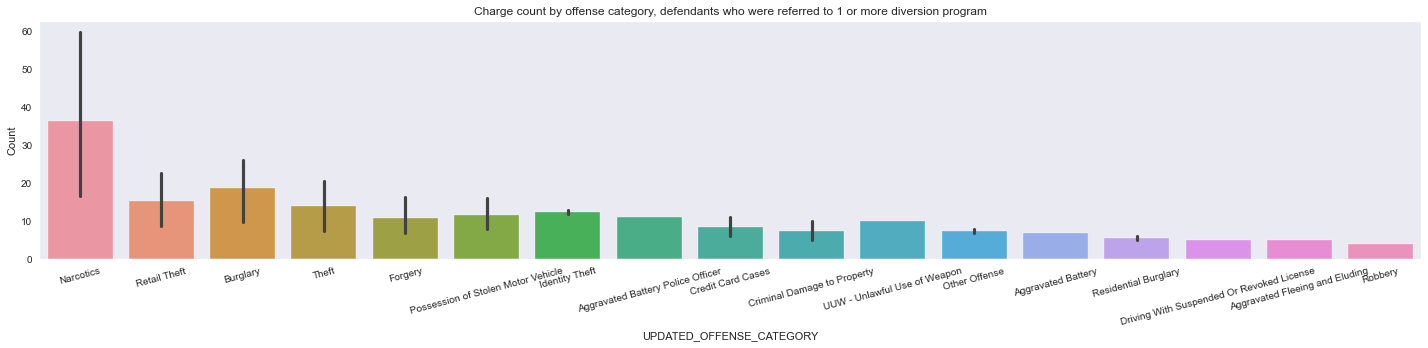

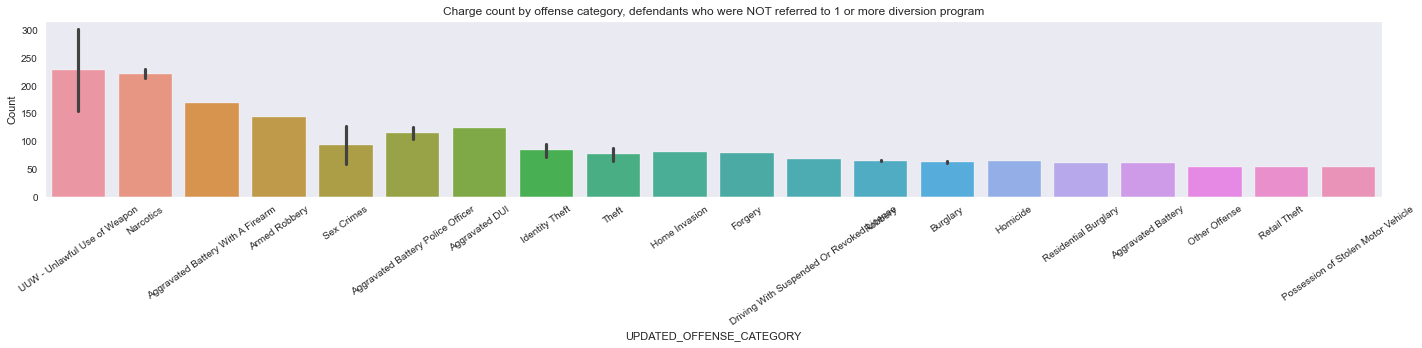

In [174]:
plt.figure(figsize=(20,5))
f = sns.barplot(x='UPDATED_OFFENSE_CATEGORY', y="Count",
                data=df_freq_diversion.head(50))
f.set_title('Charge count by offense category, defendants who were referred to 1 or more diversion program')
plt.xticks(rotation=15)
plt.tight_layout()

plt.figure(figsize=(20,5))
f = sns.barplot(x='UPDATED_OFFENSE_CATEGORY', y="Count",
                data=df_freq_Ndiversion.head(30))
plt.xticks(rotation=35)
f.set_title('Charge count by offense category, defendants who were NOT referred to 1 or more diversion program')
plt.tight_layout()

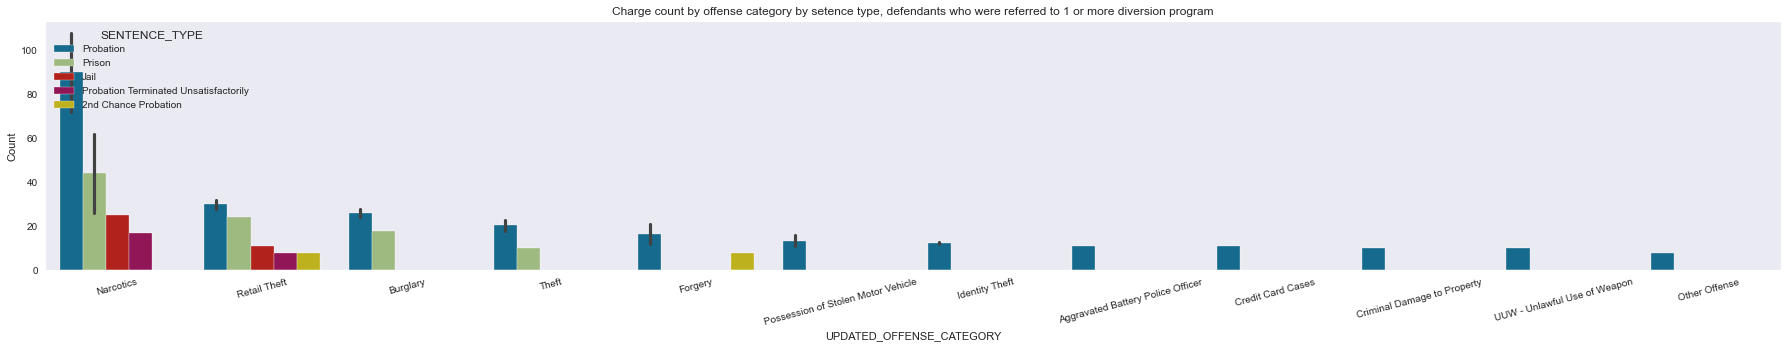

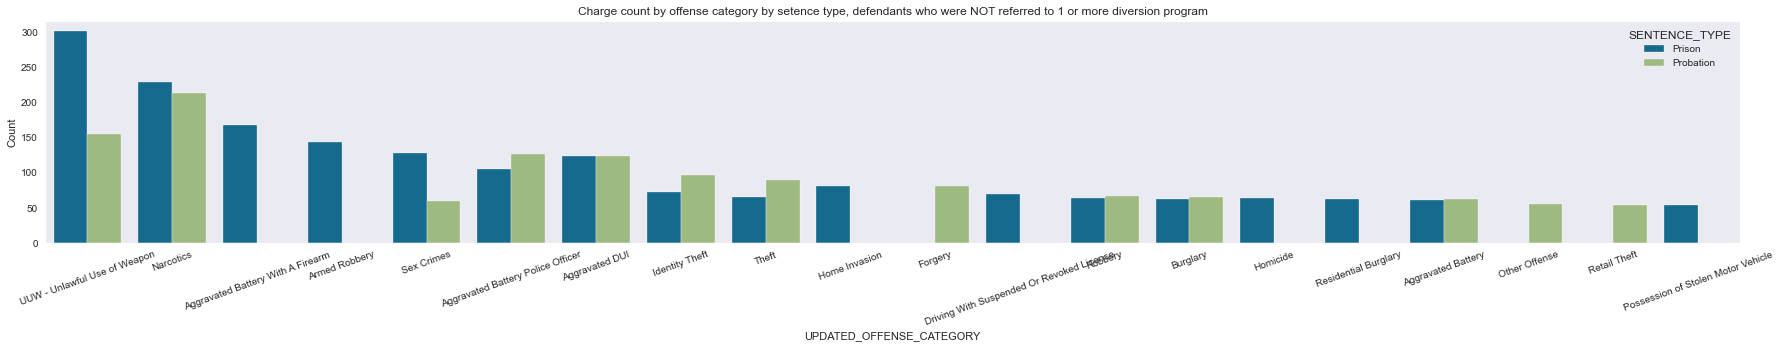

In [175]:
plt.figure(figsize=(25,5))
pre_2012 = sns.barplot(x='UPDATED_OFFENSE_CATEGORY', y="Count", hue='SENTENCE_TYPE',
                data=df_freq_diversion.head(30))
pre_2012.set_title('Charge count by offense category by setence type, defendants who were referred to 1 or more diversion program')
plt.xticks(rotation=15)
plt.tight_layout()

plt.figure(figsize=(25,5))
pre_2012 = sns.barplot(x='UPDATED_OFFENSE_CATEGORY', y="Count",hue='SENTENCE_TYPE',
                data=df_freq_Ndiversion.head(30))
plt.xticks(rotation=20)
pre_2012.set_title('Charge count by offense category by setence type, defendants who were NOT referred to 1 or more diversion program')
plt.tight_layout()

## Clustering
- Although the assignment did not instruct us to use ML, I found this assignment to be a great opportunity to do so. Below I will use KMeans clustering that will create clusters containing groupings of data based on similar features.

In [179]:
#With diversion program
df_diversion_participants_diversion_cluster = df_diversion_participants_.groupby(['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','AGE_AT_INCIDENT','BOND_AMOUNT_INITIAL','INCIDENT_CITY','DIVERSION_PROGRAM','DIVERSION_RESULT'])['CHARGE_ID'].size().reset_index()
df_diversion_cluster = df_diversion_participants_.groupby(['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','AGE_AT_INCIDENT','BOND_AMOUNT_INITIAL','INCIDENT_CITY'])['CHARGE_ID'].size().reset_index()

In [180]:
#With diversion program
df_NOTdiversion_cluster = df_NOTdiversion_participants_.groupby(['UPDATED_OFFENSE_CATEGORY','SENTENCE_TYPE','GENDER','AGE_AT_INCIDENT','BOND_AMOUNT_INITIAL','INCIDENT_CITY'])['CHARGE_ID'].size().reset_index()

In [181]:
#Numeric to categorical split
from sklearn import preprocessing

#Start with diversion program participants

#Select numeric columns
df_diversion_cluster_NUMcols = df_diversion_cluster.select_dtypes(include=[np.number]).columns
#Select categorical  columns
df_diversion_cluster_CATcols = df_diversion_cluster.columns.difference(df_diversion_cluster_NUMcols)

#Encode to transform back to categorical later
encoder_d = {}

#Transform categorical data and then replace in dataframe
for col in df_diversion_cluster_CATcols:
    encoder_d[col] = preprocessing.LabelEncoder() 
    df_diversion_cluster[col] = encoder_d[col].fit_transform(df_diversion_cluster[col])

In [182]:
#Do the same thing to the participants not in diversion programs
df_Ndiversion_cluster_NUMcols = df_NOTdiversion_cluster.select_dtypes(include=[np.number]).columns

df_NOTdiversion_cluster_CATcols = df_NOTdiversion_cluster.columns.difference(df_Ndiversion_cluster_NUMcols)


#Encode to transform back to categorical later
encoder_nd = {}

#Transform categorical data and then replace in dataframe
for col in df_NOTdiversion_cluster_CATcols:
    encoder_nd[col] = preprocessing.LabelEncoder() 
    df_NOTdiversion_cluster[col] = encoder_nd[col].fit_transform(df_NOTdiversion_cluster[col])

### Clustering defendants in diversion programs

In [183]:
# import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
df_demographics_diversion

# normalize daa with MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(df_diversion_cluster)

# reduce dimensionality with PCA
print('Number of features before PCA: {}'.format(len(X_mms[0])))
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_mms)
print('Number of features after PCA: {}'.format(len(X_pca[0])))

Number of features before PCA: 7
Number of features after PCA: 4


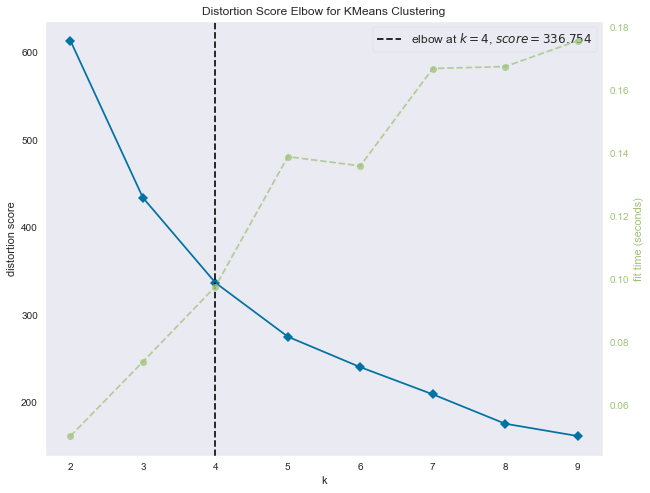

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [184]:
# import libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# create a kmeans model
model = KMeans(random_state=42)

# use the KElbowVisualizer to calculate distortion for different numbers of clusters
plt.figure(figsize=(10,8))
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_pca)  
visualizer.show()

In [185]:
# create a k-means model and assign each customer to a cluster
kmeans = KMeans(n_clusters=4, random_state=42)
prediction = kmeans.fit_predict(X_pca)

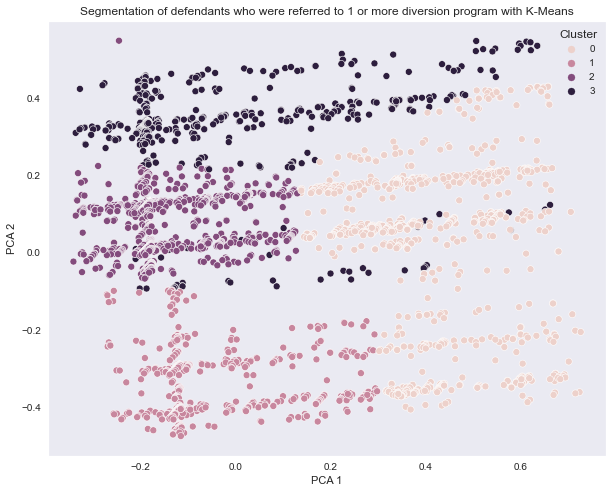

In [186]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# first PCA component
pca1_d = [val[0] for val in X_pca]
# second PCA component
pca2_d = [val[1] for val in X_pca]

# add the cluster and PCA components to the dataframe
df_diversion_cluster['Cluster'] = prediction
df_diversion_cluster['PCA 1'] = pca1_d
df_diversion_cluster['PCA 2'] = pca2_d

# plot scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_diversion_cluster, x='PCA 1', y='PCA 2', hue='Cluster')
plt.title('Segmentation of defendants who were referred to 1 or more diversion program with K-Means')
plt.show()

### Clustering defendants NOT in diversion programs

In [187]:
# import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
df_demographics_diversion

# normalize daa with MinMaxScaler
mms = MinMaxScaler()
X_mms = mms.fit_transform(df_NOTdiversion_cluster)

# reduce dimensionality with PCA
print('Number of features before PCA: {}'.format(len(X_mms[0])))
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_mms)
print('Number of features after PCA: {}'.format(len(X_pca[0])))

Number of features before PCA: 7
Number of features after PCA: 4


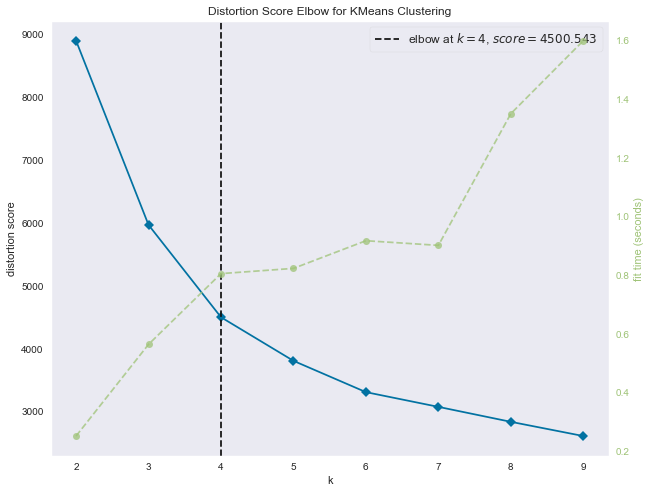

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [188]:
# import libraries
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# create a kmeans model
model = KMeans(random_state=42)

# use the KElbowVisualizer to calculate distortion for different numbers of clusters
plt.figure(figsize=(10,8))
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_pca)  
visualizer.show()

In [189]:
# create a k-means model and assign each customer to a cluster
kmeans = KMeans(n_clusters=4, random_state=42)
prediction = kmeans.fit_predict(X_pca)

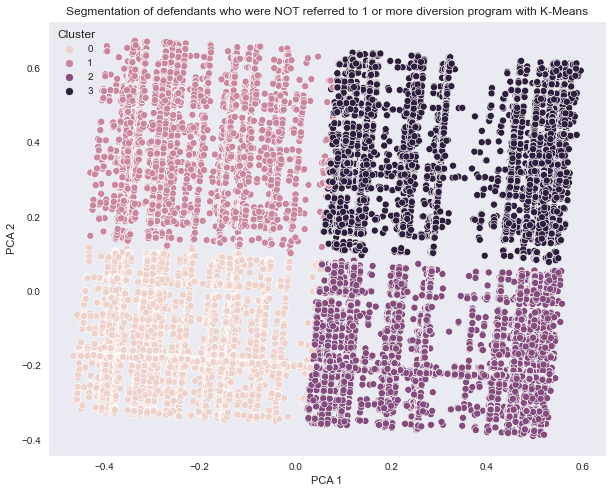

In [191]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# first PCA component
pca1_dnd = [val[0] for val in X_pca]
# second PCA component
pca2_nd = [val[1] for val in X_pca]

# add the cluster and PCA components to the dataframe
df_NOTdiversion_cluster['Cluster'] = prediction
df_NOTdiversion_cluster['PCA 1'] = pca1_dnd
df_NOTdiversion_cluster['PCA 2'] = pca2_nd

# plot scatter plot
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_NOTdiversion_cluster, x='PCA 1', y='PCA 2', hue='Cluster')
plt.title('Segmentation of defendants who were NOT referred to 1 or more diversion program with K-Means')
plt.show()

In [192]:
#Reverse encoding defendants in diversion programs
for col in df_diversion_cluster_CATcols:
    df_diversion_cluster[col] = encoder_nd[col].inverse_transform(df_diversion_cluster[col])
#Reverse encoding defendants NOT in diversion programs
for col in df_NOTdiversion_cluster_CATcols:
    df_NOTdiversion_cluster[col] = encoder_nd[col].inverse_transform(df_NOTdiversion_cluster[col])

In [194]:
grouped_d = df_diversion_cluster.groupby(['UPDATED_OFFENSE_CATEGORY','Cluster'])['CHARGE_ID'].sum().reset_index().sort_values(by='CHARGE_ID', ascending=False)
grouped_nd = df_NOTdiversion_cluster.groupby(['UPDATED_OFFENSE_CATEGORY','Cluster'])['CHARGE_ID'].sum().reset_index().sort_values(by='CHARGE_ID', ascending=False)

In [195]:
print('Offense category by cluster summary statistics for defendants referred to diversion programs:')
grouped_d.groupby(['UPDATED_OFFENSE_CATEGORY'])['CHARGE_ID','Cluster'].agg([np.mean, np.std, np.var]).dropna().sort_values(by=('CHARGE_ID','mean'),ascending=False).head(10)

Offense category by cluster summary statistics for defendants referred to diversion programs:


CHARGE_ID                             \
                                          mean          std           var   
UPDATED_OFFENSE_CATEGORY                                                    
Deceptive Practice                 2187.333333  2027.532819  4.110889e+06   
Fraudulent ID                       721.333333   236.722059  5.603733e+04   
Aggravated Battery Police Officer   464.500000   652.659559  4.259645e+05   
Arson                               238.333333   350.129024  1.225903e+05   
Criminal Damage to Property         201.000000   141.806206  2.010900e+04   
Hate Crimes                         188.333333    24.664414  6.083333e+02   
Child Pornography                   124.750000    62.377213  3.890917e+03   
Home Invasion                        83.000000   113.221023  1.281900e+04   
Escape - Failure to Return           65.333333    64.127477  4.112333e+03   
Attempt Armed Robbery                59.333333    31.785741  1.010333e+03   

                                    Cluster                      
                                       mean       std       var  
UPDATED_OFFENSE_CATEGORY                                         
Deceptive Practice                 1.000000  1.000000  1.000000  
Fraudulent ID                      1.000000  1.000000  1.000000  
Aggravated Battery Police Officer  1.500000  2.121320  4.500000  
Arson                              1.333333  1.527525  2.333333  
Criminal Damage to Property        1.000000  1.000000  1.000000  
Hate Crimes                        1.000000  1.000000  1.000000  
Child Pornography                  1.500000  1.290994  1.666667  
Home Invasion                      1.000000  1.000000  1.000000  
Escape - Failure to Return         1.000000  1.000000  1.000000  
Attempt Armed Robbery              1.333333  1.527525  2.333333

In [196]:
print('Referred to diversion program cluster distribution statistics:')
grouped_d.groupby(['Cluster'])['CHARGE_ID'].agg([np.sum,np.mean, np.std, np.var]).sort_values(by='sum', ascending=False)

Referred to diversion program cluster distribution statistics:


,sum,mean,std,var
Cluster,,,,
2,6791,323.380952,966.073417,933297.847619
1,2780,139.000000,373.316995,139365.578947
3,2191,99.590909,227.825886,51904.634199
0,1922,80.083333,165.966187,27544.775362


In [197]:
print('Offense category by cluster summary statistics for defendants NOT referred to diversion programs:')
grouped_nd.groupby(['UPDATED_OFFENSE_CATEGORY'])['CHARGE_ID','Cluster'].agg([np.mean, np.std, np.var]).dropna().dropna().sort_values(by=('CHARGE_ID','mean'),ascending=False).head(10)

Offense category by cluster summary statistics for defendants NOT referred to diversion programs:


CHARGE_ID                              \
                                       mean           std           var   
UPDATED_OFFENSE_CATEGORY                                                  
UUW - Unlawful Use of Weapon        66666.5  82955.646248  6.881639e+09   
Narcotics                           45954.5  53808.704728  2.895377e+09   
Aggravated DUI                      16999.5   7471.997357  5.583074e+07   
Aggravated Battery With A Firearm   13776.0  13036.220618  1.699430e+08   
Aggravated Battery Police Officer   13021.5  12498.112357  1.562028e+08   
Sex Crimes                          12967.0  10674.483969  1.139446e+08   
Armed Robbery                       10031.0  10787.621054  1.163728e+08   
Burglary                             6767.0   5102.482533  2.603533e+07   
Theft                                6480.0   2402.748842  5.773202e+06   
Identity Theft                       6204.0    865.498700  7.490880e+05   

                                  Cluster                 
                                     mean       std  var  
UPDATED_OFFENSE_CATEGORY                                  
UUW - Unlawful Use of Weapon          0.5  0.707107  0.5  
Narcotics                             0.5  0.707107  0.5  
Aggravated DUI                        2.5  0.707107  0.5  
Aggravated Battery With A Firearm     2.5  0.707107  0.5  
Aggravated Battery Police Officer     2.5  0.707107  0.5  
Sex Crimes                            0.5  0.707107  0.5  
Armed Robbery                         2.5  0.707107  0.5  
Burglary                              2.5  0.707107  0.5  
Theft                                 0.5  0.707107  0.5  
Identity Theft                        0.5  0.707107  0.5

In [198]:
print('Not referred to diversion program cluster distribution statistics:')
grouped_nd.groupby(['Cluster'])['CHARGE_ID'].agg([np.sum,np.mean, np.std, np.var]).sort_values(by='sum', ascending=False)

Not referred to diversion program cluster distribution statistics:


,sum,mean,std,var
Cluster,,,,
0,299475,7880.921053,23971.980746,5.746559e+08
2,139130,3661.315789,6589.795724,4.342541e+07
1,47732,1446.424242,2332.438223,5.440268e+06
3,41596,1124.216216,2178.173523,4.744440e+06


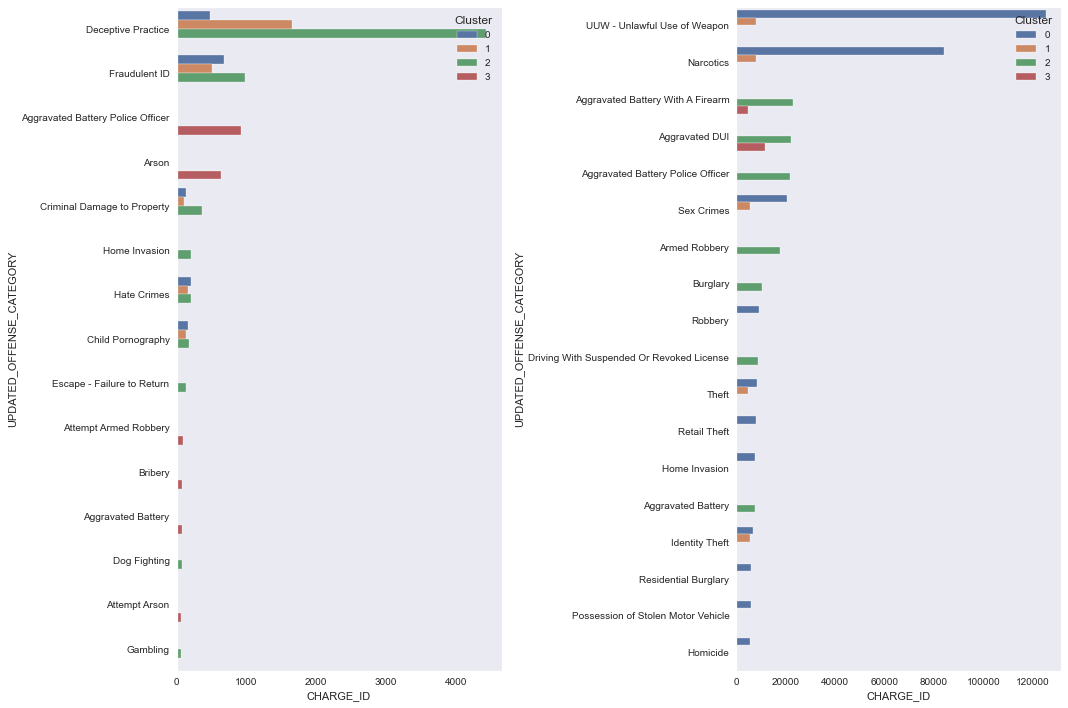

In [204]:
sns.set_style("dark")

import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the matplotlib figure
f, axs = plt.subplots(1, 2, figsize=(15, 10))

# Plot the total crashes
sns.barplot(x="CHARGE_ID", y="UPDATED_OFFENSE_CATEGORY", data=grouped_d.head(25), palette="deep",
            hue="Cluster", color="b", ax=axs[0],dodge=True)

# Plot the crashes where alcohol was involved
sns.barplot(x="CHARGE_ID", y="UPDATED_OFFENSE_CATEGORY", data=grouped_nd.head(25), palette="deep",
            hue="Cluster",color="r",  ax=axs[1], dodge=True)

plt.tight_layout()

plt.show()


## Concluding analysis
- The cluster distribution statistics for defendants who were referred to diversion programs shows a high number of charges in cluster 2
- The cluster distribution statistics for defendants who were NOT referred to diversion programs shows a high number of charges in cluster 0

The remainder of the analysis will focus on these two clusters.

In [165]:
print('Cluster 2: Top 15 incident cities by total charge count, diversion referrals')
#Since cluster 0 had the most charges I will look at this cluster to identify certain attrbiubes that are similar amoung individuals who are referred to diversion progams
df_diversion_cluster[df_diversion_cluster['Cluster']==2].groupby(['INCIDENT_CITY'])['CHARGE_ID'].sum().reset_index().head(15).sort_values(by='CHARGE_ID',ascending=False)

Cluster 2: Top 15 incident cities by total charge count, diversion referrals


,INCIDENT_CITY,CHARGE_ID
0,Algonquin,58
1,Alsip,32
8,Bartlett,30
10,Beecher,27
4,Arlington Hts,26
9,Bedford Park,24
14,Berwyn,24
11,Bellwood,20
13,Berkeley,14
12,Bensenville,9


In [164]:
print('Cluster 0: Top 15 incident cities by total charge count, NOT diversion referrals')
df_NOTdiversion_cluster[df_NOTdiversion_cluster['Cluster']==0].groupby(['INCIDENT_CITY'])['CHARGE_ID'].sum().reset_index().head(15).sort_values(by='CHARGE_ID',ascending=False)

Cluster 0: Top 15 incident cities by total charge count, NOT diversion referrals


,INCIDENT_CITY,CHARGE_ID
14,Berwyn,2264
3,Arlington Heights,1466
11,Bellwood,1105
1,Alsip,457
9,Bedford Park,276
6,Barrington,218
8,Bartlett,189
13,Berkeley,169
4,Arlington Hts,24
10,Beecher,13


In [205]:
print('Cluster 2: Top 15 offense types by total charge count, diversion referrals')
#Since cluster 0 had the most charges I will look at this cluster to identify certain attrbiubes that are similar amoung individuals who are referred to diversion progams
df_diversion_cluster[df_diversion_cluster['Cluster']==2].groupby(['UPDATED_OFFENSE_CATEGORY'])['CHARGE_ID'].sum().reset_index().head(15).sort_values(by='CHARGE_ID',ascending=False)

Cluster 2: Top 15 offense types by total charge count, diversion referrals


,UPDATED_OFFENSE_CATEGORY,CHARGE_ID
7,Deceptive Practice,4430
4,Criminal Damage to Property,364
2,Child Pornography,175
11,Escape - Failure to Return,139
8,Dog Fighting,77
14,Fraud,57
3,Communicating With Witness,30
1,Burglary,12
0,Bribery,9
5,Criminal Trespass To Residence,8


In [206]:
print('Cluster 0: Top 15 offense types by total charge count, NOT diversion referrals')
df_NOTdiversion_cluster[df_NOTdiversion_cluster['Cluster']==0].groupby(['UPDATED_OFFENSE_CATEGORY'])['CHARGE_ID'].sum().reset_index().head(15).sort_values(by='CHARGE_ID',ascending=False)

Cluster 0: Top 15 offense types by total charge count, NOT diversion referrals


,UPDATED_OFFENSE_CATEGORY,CHARGE_ID
13,Narcotics,84003
5,Home Invasion,7389
8,Identity Theft,6816
6,Homicide,5691
11,Kidnapping,1234
12,Major Accidents,595
10,Intimidation,505
7,Human Trafficking,316
0,Fraudulent ID,209
9,Impersonating Police Officer,153
